In [1]:
import numpy as np
from matplotlib import pyplot as plt
import plotly.graph_objects as go
plt.style.use('dark_background')
from pypalettes import load_cmap
import warnings
warnings.filterwarnings("ignore") 

import plotly.io as pio
pio.renderers.default = 'notebook'

cmap = plt.get_cmap('Pastel1')
plt.get_cmap('Pastel1')
palette = load_cmap('Alexandrite')

import ReadCube as readcube

# Extracting the magnetopause from the MHD emissivity


Instead of trying to smooth the LaTeP surface and deal with the discrete nature of the particle simulation, it would suffice to show that the maximum emissivity calculated from the MHD input coincides with the mean maximum curve of the particle model. This is to be expected, since the particles follow the motion dictated by the input fields and the position of the magnetopause should be able to be defined both by the field and the emissivity interchangeably. We load the cube and convert to spherical coordinates:


In [2]:
cube_MHD = readcube.Cube("MHD_OpenGGCM", step=0.05)
Q_MHD_GSE = cube_MHD.Q_GSE()
R, Theta, Phi, Q_MHD_sph = cube_MHD.cartesian_to_spherical(rmax = 15, dtheta = 0.5, dphi = 0.5)

The XY and XZ slices of the MHD emissivity cube are plotted in spherical coordinates:

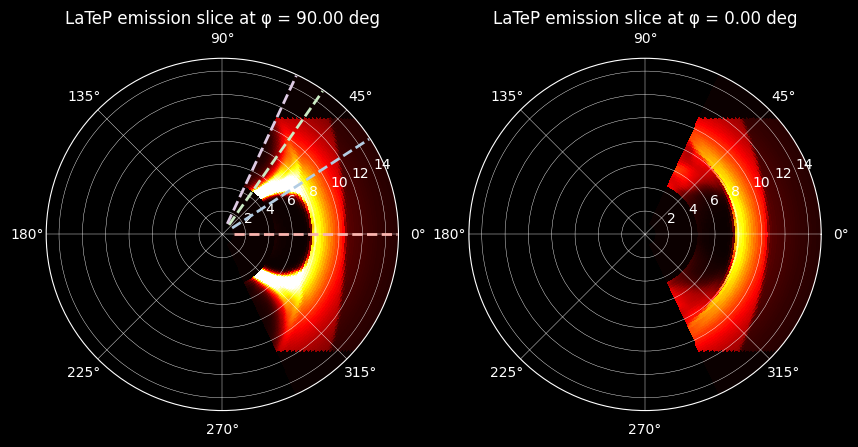

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), subplot_kw={'projection': 'polar'})

phi_index = 180
axs[0].pcolormesh(Theta[:, :, phi_index], R[:, :, phi_index], Q_MHD_sph[:,:,phi_index], cmap='hot',vmax=1e-6)
theta_lines = [0, np.deg2rad(33), np.deg2rad(55), np.deg2rad(65)]
c = 0
for t in theta_lines:
    axs[0].plot([t, t], [R[:, :, phi_index].min(), R[:, :, phi_index].max()], color=cmap(c), linestyle='--', linewidth=2)
    c+=1
axs[0].set_title("LaTeP emission slice at φ = {:.2f} deg".format(np.degrees(Phi[0, 0, phi_index])))
axs[0].grid(which='major', color='white', linewidth=0.3)

phi_index = 0
axs[1].pcolormesh(Theta[:, :, phi_index], R[:, :, phi_index], Q_MHD_sph[:,:,phi_index], cmap='hot',vmax=1e-6)
axs[1].set_title("LaTeP emission slice at φ = {:.2f} deg".format(np.degrees(Phi[0, 0, phi_index])))
axs[1].grid(which='major', color='white', linewidth=0.3)


plt.show()

To better understand the radial profile of the emissivity, we plot it versus the radius for different polar $\theta$ directions denoted above. We notice similar peaks as in the LaTeP case but with much smoother behavior as well as moderate contribution from the cusps, particularly due to the mask that is applied to remove the artificial inner-magnetosphere emission at $R \leq 4 \,RE$.

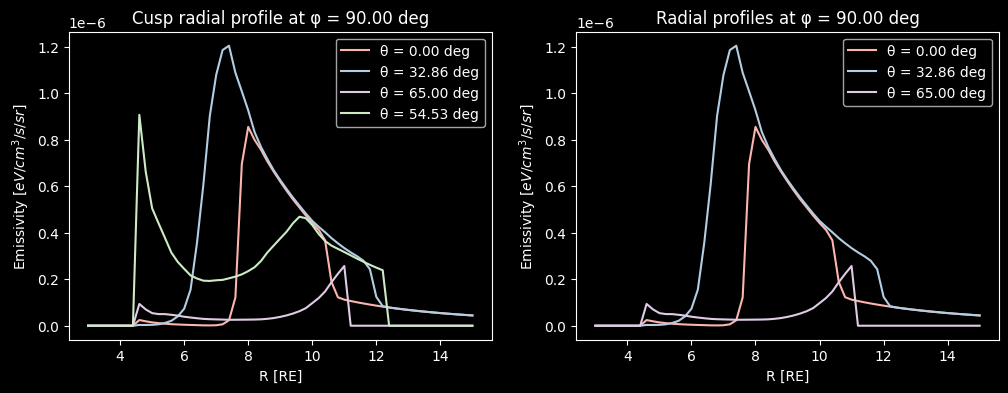

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ph = 180
th = 180
axs[0].plot(R[th,10:,ph],Q_MHD_sph[th,10:,ph], label= f"θ = {np.degrees(Theta[th, 0, ph]):.2f} deg", color=cmap(0))
th = -90
axs[0].plot(R[th,10:,ph],Q_MHD_sph[th,10:,ph], label= f"θ = {np.degrees(Theta[th, 0, ph]):.2f} deg", color=cmap(1))
th = -1
axs[0].plot(R[th,10:,ph],Q_MHD_sph[th,10:,ph], label= f"θ = {np.degrees(Theta[th, 0, ph]):.2f} deg", color=cmap(3))
th = -30
axs[0].plot(R[th,10:,ph],Q_MHD_sph[th,10:,ph], label= f"θ = {np.degrees(Theta[th, 0, ph]):.2f} deg", color=cmap(2))
axs[0].set_title(f"Cusp radial profile at φ = {np.degrees(Phi[th, 0, ph]):.2f} deg")
axs[0].set_xlabel("R [RE]")
axs[0].set_ylabel("Emissivity [$eV/cm^3/s/sr$]")
axs[0].legend()

th = 180
axs[1].plot(R[th,10:,ph],Q_MHD_sph[th,10:,ph], label= f"θ = {np.degrees(Theta[th, 0, ph]):.2f} deg", color=cmap(0))
th = -90
axs[1].plot(R[th,10:,ph],Q_MHD_sph[th,10:,ph], label= f"θ = {np.degrees(Theta[th, 0, ph]):.2f} deg", color=cmap(1))
th = -1
axs[1].plot(R[th,10:,ph],Q_MHD_sph[th,10:,ph], label= f"θ = {np.degrees(Theta[th, 0, ph]):.2f} deg", color=cmap(3))
axs[1].set_title(f"Radial profiles at φ = {np.degrees(Phi[th, 0, ph]):.2f} deg")
axs[1].set_xlabel("R [RE]")
axs[1].set_ylabel("Emissivity [$eV/cm^3/s/sr$]")
axs[1].legend()

plt.show()


By following the previous methods, we can extract the maximum intensity per radial direction and plot it as a surface in \autoref{fig:MHD_surface}. Comparing to \autoref{fig:max_emissivity} this returns a smoother surface and further points away from the cusps. We can also try to limit the radial extend of the cusps to above $5\,RE$, and thus gain more information on the directions that are blocked by them (\autoref{fig:MHD_max_r_lim}).


We can understand further the structured and discontinuous features of the LaTeP surface by examining \autoref{fig:2peaks}. Here we plot both the global maximum peak, and the second maximum. In the MHD case, the second peak is indeed detected in the outer boundary of the magnetopause, and can be utilized to construct a surface without the problem of obscuring some points by the curvature of the cusps. In the LaTeP case, the second peak jumps from one boundary to another and oftentimes overshoots for the directions that we do not have two physical maxima. This is caused by the "bumpy" behavior of the radial profiles, meaning that small disturbances along the first maximum will be counted as a higher peak than the second maximum. This also causes the overshoot of the subsolar distance when fitting empirical models to the LaTeP surface. By limiting the radial maxima as well as the magnitude, we have essentially forced it to jump to these bumps for certain directions, resulting in an even higher variability in the surface, than if we took the total maximum. This could potentially be mitigated by smoothing the radial profiles before extracting the maxima. 


Moving back to the analysis of the MHD cube, we can utilize the smooth behavior seen in \autoref{fig:MHDs2peaks} to construct a surface where we keep both the first and second maxima, keeping both the information about the strong indentation and the outer boundary. This is plotted in \autoref{fig:MHD_surface_final}.
